# Investigation of P.I.S.A. 2012 Data
### by Youssef Ahmed Khattab

## Investigation Overview

Throughout the course of this notebook I will have these two questions in mind:

- Are there contrasts in accomplishment dependent on gender or parental education levels?
- Is there a connection between the measure of time a student dedicates to learning and their score? 

To do this, I will look at variables related to in school and out of school study times, their gender, and their parental levels of education. 

## Dataset Overview

This NoteBook will be devoted to investigating subtleties of the PISA 2012 dataset. PISA, specifically, is a "overview of understudies' abilities and information as they approach the finish of obligatory schooling. It's anything but a traditional school test. As opposed to analyzing how well understudies have taken in the school educational plan, it sees how solid and steady they are for life beyond school"

Inside this datset we can discover data for around 510,000 students. For every one of these students, there are 636 answers which we can find in the segments. Of these, I chose to fight this dataset into a more reasonable dataset of 15167 students with 19 segments.

In [1]:
# import all req. packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# Load Dataset
pisa = pd.read_csv('pisa_wrg.csv')


# Color for Scatter Plots
cmap=sb.diverging_palette(20, 220, n=200)

In [8]:
# Convert parental level of education into ordered categorical types
ordinal_var_dict = {'Education - Father': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent'],
                    'Education - Mother': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

## Scores vs. Total Study and Learning Times

We can get going by looking at the measure of time an student places into their investigations and the score they accomplished. There cut off up being essentially no association between the Learning Time - Total, the Out-of-School Study Time - Total, and every one of the Score measurements. This quickly alluded to the appropriate response: there is no connection between time spent learning and a definitive score.

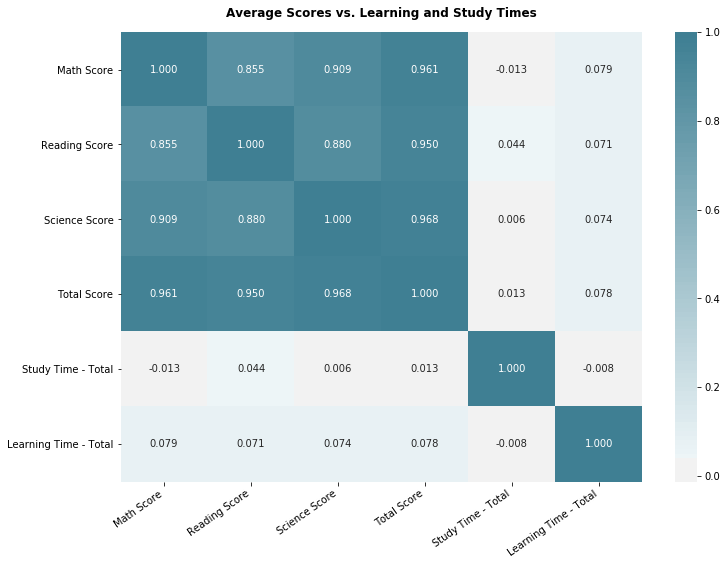

In [10]:
numVars = ['Average_Math_Score', 
            'Average_Reading_Score', 
            'Average_Science_Score', 
            'Average_Total_Score', 
            'Out-of-School Study Time - Total', 
            'Learning Time - Total']

shortNVars = ['Math Score', 
                'Reading Score', 
                'Science Score', 
                'Total Score', 
                'Study Time - Total', 
                'Learning Time - Total']

# Correlation plot
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(pisa[numVars].corr(), annot = True, fmt = '.3f',
           cmap = cmap, center = 0)

plt.title('Average Scores vs. Learning and Study Times', pad = 15, fontweight = 'semibold')
plt.xticks(np.arange(0.5,len(numVars), 1), shortVars, ha='right', rotation=35)
plt.yticks(np.arange(0.5,len(numVars), 1), shortVars, ha='right')
plt.show();

## Scores vs. Learning Times

Let's break down the Learning Time variables. It became clear that Learning Time - Science was the variable that raised the Learning Time - Total. It had a average positive connection, and this is sufficient to order it as a feeble positive relationship.

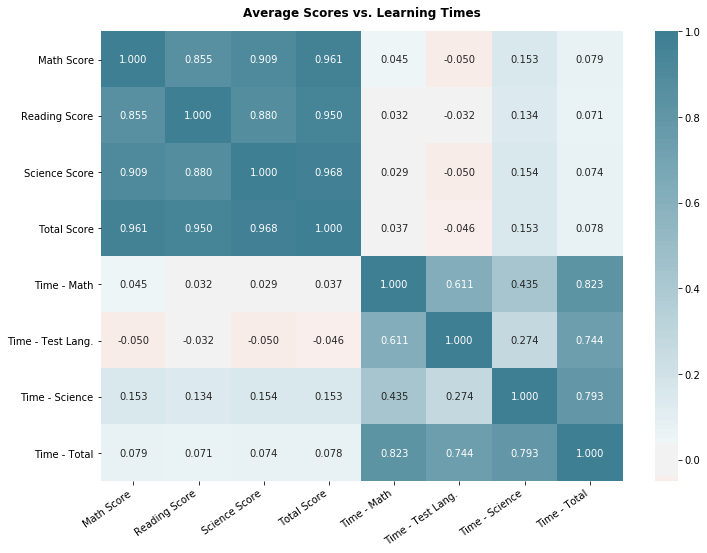

In [11]:
scoreLearnVars = ['Average_Math_Score', 
                  'Average_Reading_Score', 
                  'Average_Science_Score', 
                  'Average_Total_Score', 
                  'Learning Time - Mathematics',
                  'Learning Time - Test Language', 
                  'Learning Time - Science', 
                  'Learning Time - Total']

shortSlVars = ['Math Score', 
                 'Reading Score', 
                 'Science Score', 
                 'Total Score', 
                 'Time - Math',
                 'Time - Test Lang.', 
                 'Time - Science', 
                 'Time - Total']

# correlation plot
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(pisa[scoreLearnVars].corr(), annot = True, fmt = '.3f',
           cmap = cmap, center = 0)
plt.title('Average Scores vs. Learning Times', pad = 15, fontweight = 'semibold')
plt.xticks(np.arange(0.5,len(scoreLearnVars), 1), shortSlVars, ha='right', rotation=35)
plt.yticks(np.arange(0.5,len(scoreLearnVars), 1), shortSlVars, ha='right')
plt.show();

## Average Total Score vs. Learning Time for Science across Mother's Education Levels

When taking a gander at the impact of Learning Time for Science versus the Average Total Score, it turns out to be evident that the Learning Time - Science variable had this powerless positive connection just when it came to more significant levels of parental education. With regards to the levels of Maternal education under post-secondary, we can see that this impact vanishes.

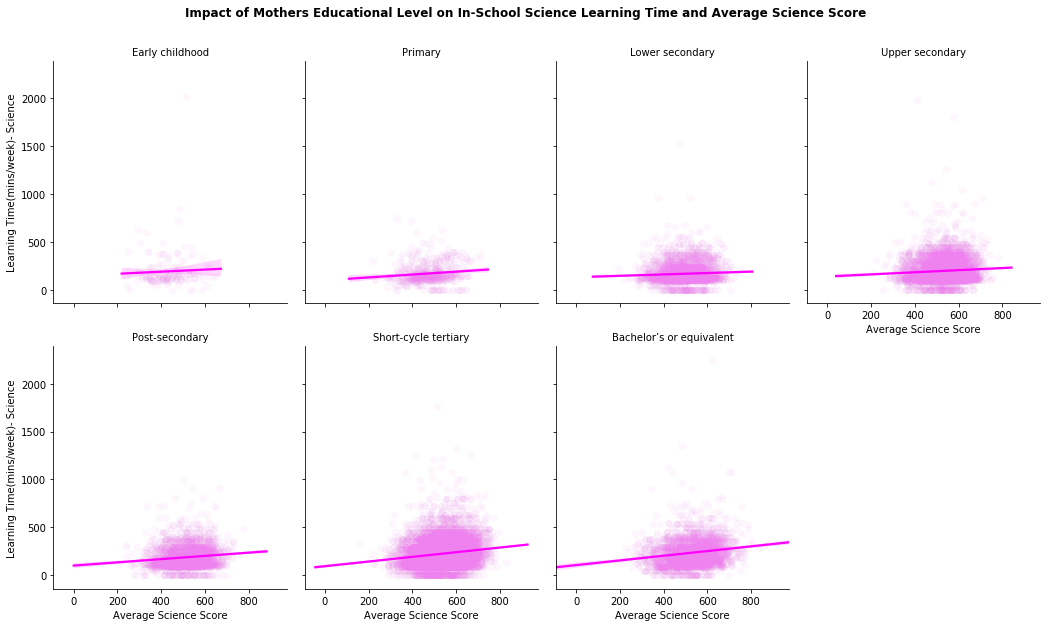

In [13]:
# Faceted scatter plots on levels of mother's education
g = sb.FacetGrid(data = pisa, 
                 col = 'Education - Mother', 
                 col_wrap = 4, 
                 height = 8.27/2, 
                 aspect = (14.70/4)/(8.27/2))
g.map(sb.regplot, 'Average_Science_Score', 'Learning Time - Science', 
      color = 'violet',  
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'fuchsia'})
g.set_xlabels('Average Science Score')
g.set_ylabels('Learning Time(mins/week)- Science')
g.set_titles('{col_name}')
plt.suptitle("Impact of Mothers Educational Level on In-School Science Learning Time and Average Science Score", 
             y = 1.05, 
             fontweight = 'semibold' )

plt.show();

## Average Scores vs. Out-of-School Study Times

Concerning the Out-of-School Study Time factors, practically every one of them showed a frail negative relationship. The one variable that didn't show a frail negative relationship was Out-of-School Study Time - Homework. This variable really had a average positive connection. This demonstrated that in spite of the fact that Homework is a positive pointer for an student's score, Out-of-School Study Time is in everyday not an excellent measurement for foreseeing the accomplishment of an student's score.

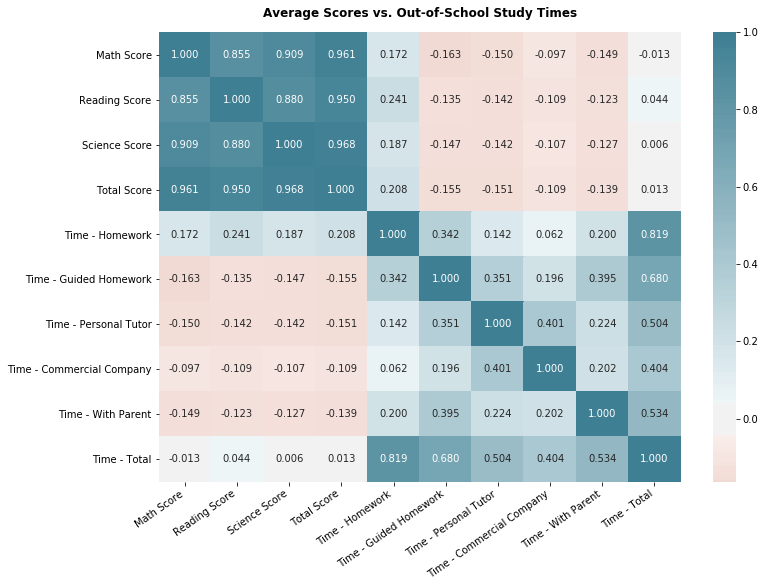

In [16]:
scoreStudyVvars = ['Average_Math_Score', 'Average_Reading_Score', 'Average_Science_Score', 
                    'Average_Total_Score', 'Out-of-School Study Time - Homework',
                    'Out-of-School Study Time - Guided Homework',
                    'Out-of-School Study Time - Personal Tutor',
                    'Out-of-School Study Time - Commercial Company',
                    'Out-of-School Study Time - With Parent', 
                    'Out-of-School Study Time - Total']
shortVars = ['Math Score', 
              'Reading Score', 
              'Science Score', 
              'Total Score', 
              'Time - Homework',
              'Time - Guided Homework',
              'Time - Personal Tutor',
              'Time - Commercial Company',
              'Time - With Parent', 
              'Time - Total']

# correlation plot
plt.figure(figsize=[ 11.69, 8.27])
g = sb.heatmap(pisa[scoreStudyVvars].corr(), annot = True, fmt = '.3f',
           cmap = cmap, center = 0)
plt.title('Average Scores vs. Out-of-School Study Times', pad = 15, fontweight = 'semibold')
plt.xticks(np.arange(0.5,len(scoreStudyVvars), 1), shortVars, ha='right', rotation=35)
plt.yticks(np.arange(0.5,len(scoreStudyVvars), 1), shortVars, ha='right')
plt.show();

## Average Total Score vs. Study Time for Homework across Mother's Education Levels

Here we have an exceptionally clear relationship that shows that the additional time an student spends on Homework, the higher their Total Score will be. This is relevant for each educational level for the mother, and it is a significant enormous difference to the wide range of various Out-of-School Study Time factors.

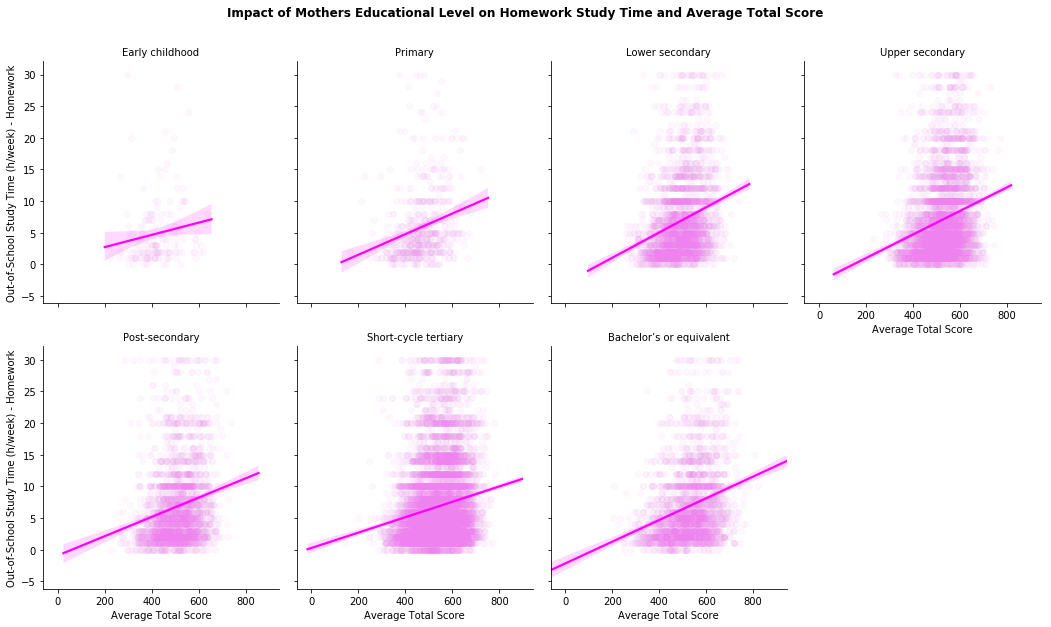

In [18]:
# Faceted heat maps on levels of mather's education
g = sb.FacetGrid(data = pisa, 
                 col = 'Education - Mother', 
                 col_wrap = 4,
                 height = 8.27/2, 
                 aspect = (14.70/4)/(8.27/2))
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Homework', 
      color = 'violet',
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'fuchsia'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Homework')
g.set_titles('{col_name}')
plt.suptitle("Impact of Mothers Educational Level on Homework Study Time and Average Total Score", 
             y = 1.05, 
             fontweight = 'semibold' )

plt.show();

## Average Total Score across Mother's and Father's Education Levels

Here we can see that the student scores develop with the education level of the parent, paying little heed to the gender of the parent, until a point where it appears to level at upper-secondary education.

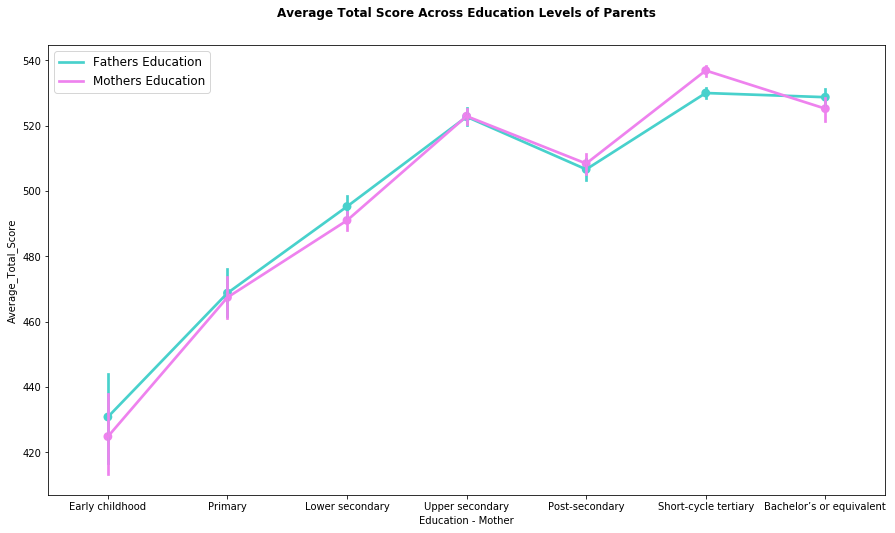

In [22]:
# Score averages of students vs education levels of Father
plt.figure(figsize=[15, 8.27])
sb.pointplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average_Total_Score',
             color = 'mediumturquoise')

# Score averages of students vs education levels of Mother
sb.pointplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average_Total_Score',
              color = 'violet')

plt.title('Average Total Score Across Education Levels of Parents', y = 1.05, fontweight = 'semibold')

# Set legend
plt.legend(labels=['Fathers Education', 'Mothers Education'],loc='upper left', fontsize='large')
# https://stackoverflow.com/questions/23698850/manually-set-color-of-points-in-legend
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('mediumturquoise')
leg.legendHandles[1].set_color('violet');

## Average Total Score between Genders across Father's Education Level

Now, we can see another point of view on the dissemination between Average Total Score and the Father's Education Level. Moreover, we can notice contrasts between the student's gender. Despite the fact that there are inconsistencies between the genders at the essential education level, for the most part the distinctions are not huge enough to make any ends. We can however see the amount of outliers in this box plot, which indicate that students with parents from higher educational levels might, on average, outperform students with parents from lower educational levels, but  there are nevertheless students with parents from higher educational levels that perform more terrible than the entirety of the students with parents from lower educational levels.

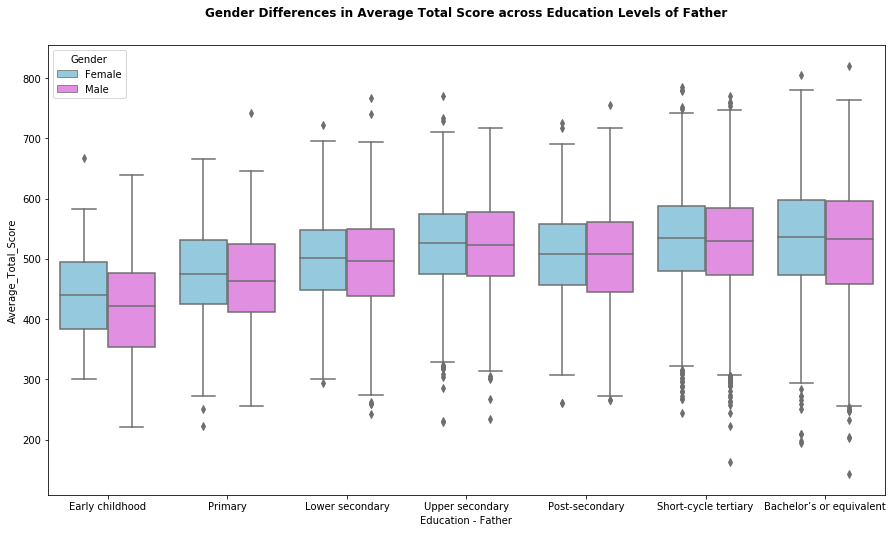

In [24]:
plt.figure(figsize=[15, 8.27])
sb.boxplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average_Total_Score',
              hue = 'Gender',
              palette = ['skyblue', 'violet']);
plt.title('Gender Differences in Average Total Score across Education Levels of Father', y = 1.05, fontweight = 'semibold');

# Thanks :)